In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from tqdm import tqdm

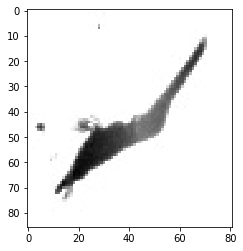

In [3]:
Data = "E:/Final project/train"
Categories = ['ZOOPLANKTON', 'PHYTOPLANKTON']

for category in Categories:  # do dogs and cats
    path = os.path.join(Data,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
IMG_SIZE = 60

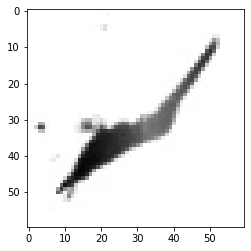

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in Categories:  

        path = os.path.join(Data,category)  
        class_num = Categories.index(category)  # get the classification  

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_training_data()
l = len(training_data)
print(l)

100%|█████████████████████████████████████████████████████████████████████████████| 9062/9062 [00:37<00:00, 242.35it/s]


29419


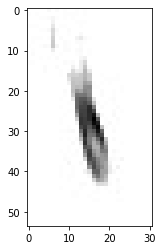

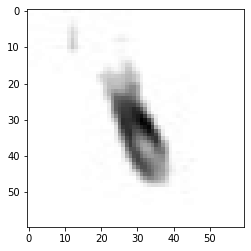

In [29]:
data1 = "E:/Final project"

Category = ['test']

for cate in Category:  
    path1 = os.path.join(data1,cate)  # create path to dogs and cats
    for img in os.listdir(path1):  # iterate over each image per dogs and cats
        img_array1 = cv2.imread(os.path.join(path1,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array1, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    
new_array1 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array1, cmap='gray')
plt.show()

In [30]:
test_data = []

def create_test_data():
     for cate in Category:  

        path1 = os.path.join(data1,cate)  
        #class_num = Categories.index(cate)    
  
        for img in tqdm(os.listdir(path1)):  # iterate over each image per dogs and cats
            try:
                img_array1 = cv2.imread(os.path.join(path1,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array1 = cv2.resize(img_array1, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append(new_array1)  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_test_data()
len(test_data)

100%|████████████████████████████████████████████████████████████████████████| 130400/130400 [00:47<00:00, 2771.47it/s]


130400

In [31]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])
    

X = []
y = []



for features,label in training_data:
    X.append(features)
    y.append(label)


x = np.array(X)
Y = np.array(y)


0
0
0
1
0
0
0
0
0
0


In [32]:
#data_train, data_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.20, random_state=42)
#len(test_data)
test_data = np.array(test_data)
#type(test_data)

In [34]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)

#data_train = np.array(data_train)

#labels_train = np.array(labels_train)
#labels_test = np.array(labels_test)
train_set_x_flatten =  x.reshape(x.shape[0], -1).T
test_set_x_flatten =  test_data.reshape(test_data.shape[0], -1).T
train_set_y = Y.reshape(1, len(Y))
#test_set_y =  labels_test.reshape(1, len(labels_test))

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
#print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))


for i in range(0, 20):
    print(train_set_y[0, i])
    

train_set_x_flatten shape: (3600, 29419)
train_set_y shape: (1, 29419)
test_set_x_flatten shape: (3600, 130400)
sanity check after reshaping: [255 255 255 255 255]
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0


In [35]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [36]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [37]:
def initialize_with_zeros(dim):
    w = np.zeros([dim, 1])
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [38]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)                                                                 # compute activation
    cost = (-1/m)*np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))                                 # compute cost
    
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    z = (A - Y)
    dw = (1/m)*np.dot(X, (z.T))
    db = (1/m)*np.sum(z)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [39]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w =  w - (learning_rate*dw)
        b =  b - (learning_rate*db)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [40]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X)+ b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction = 1. * (A > 0.5)
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [45]:
def model(X_train, Y_train, X_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print(Y_prediction_test)

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [46]:
d = model(train_set_x, train_set_y, test_set_x, num_iterations = 2000, learning_rate = 0.003, print_cost = True)

train accuracy: 78.12298174649037 %
[[0. 0. 0. ... 0. 0. 0.]]
